/home/ece4191e5/ECE4191-E5-tennibot
Logger name: robot_core.orchestration.orchestrator_mp.Orchestrator
Logger level: 0
Logger handlers: []
Logger parent: <RootLogger root (INFO)>
Coordinator Process (PID: 20908) running with: 12 threads
Inside robot run
Orchestrator Process (PID: 20948) running with: 1 threads
not simulated robot, initalising real
start of robot constructor
before motor pins


/home/ece4191e5/ECE4191-E5-tennibot/robot_core/hardware/diff_drive_robot.py:68: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(self.motor_L_in1, GPIO.OUT)
/home/ece4191e5/ECE4191-E5-tennibot/robot_core/hardware/diff_drive_robot.py:69: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(self.motor_L_in2, GPIO.OUT)
/home/ece4191e5/ECE4191-E5-tennibot/robot_core/hardware/diff_drive_robot.py:70: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(self.motor_R_in3, GPIO.OUT)
/home/ece4191e5/ECE4191-E5-tennibot/robot_core/hardware/diff_drive_robot.py:71: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(self.motor_R_in4, GPIO.OUT)


after motor pins


/home/ece4191e5/ECE4191-E5-tennibot/robot_core/hardware/diff_drive_robot.py:83: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(ml_pwm, GPIO.OUT)
/home/ece4191e5/ECE4191-E5-tennibot/robot_core/hardware/diff_drive_robot.py:84: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(mr_pwm, GPIO.OUT)


end of robot constructor
    Initialised real robot.
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


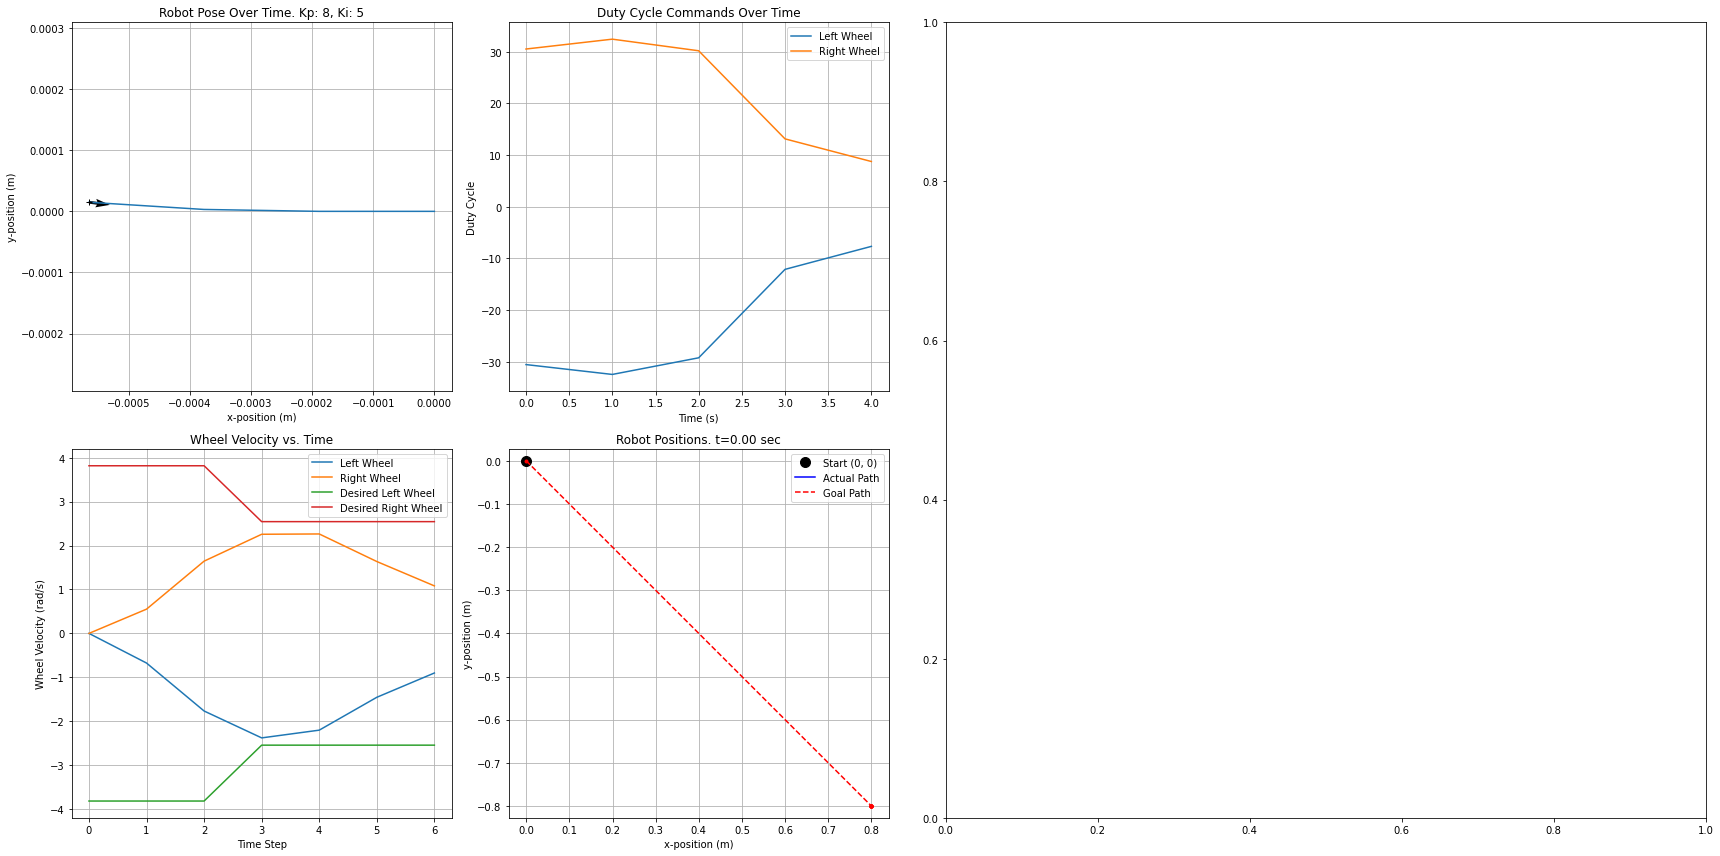

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop

inside running loopinside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


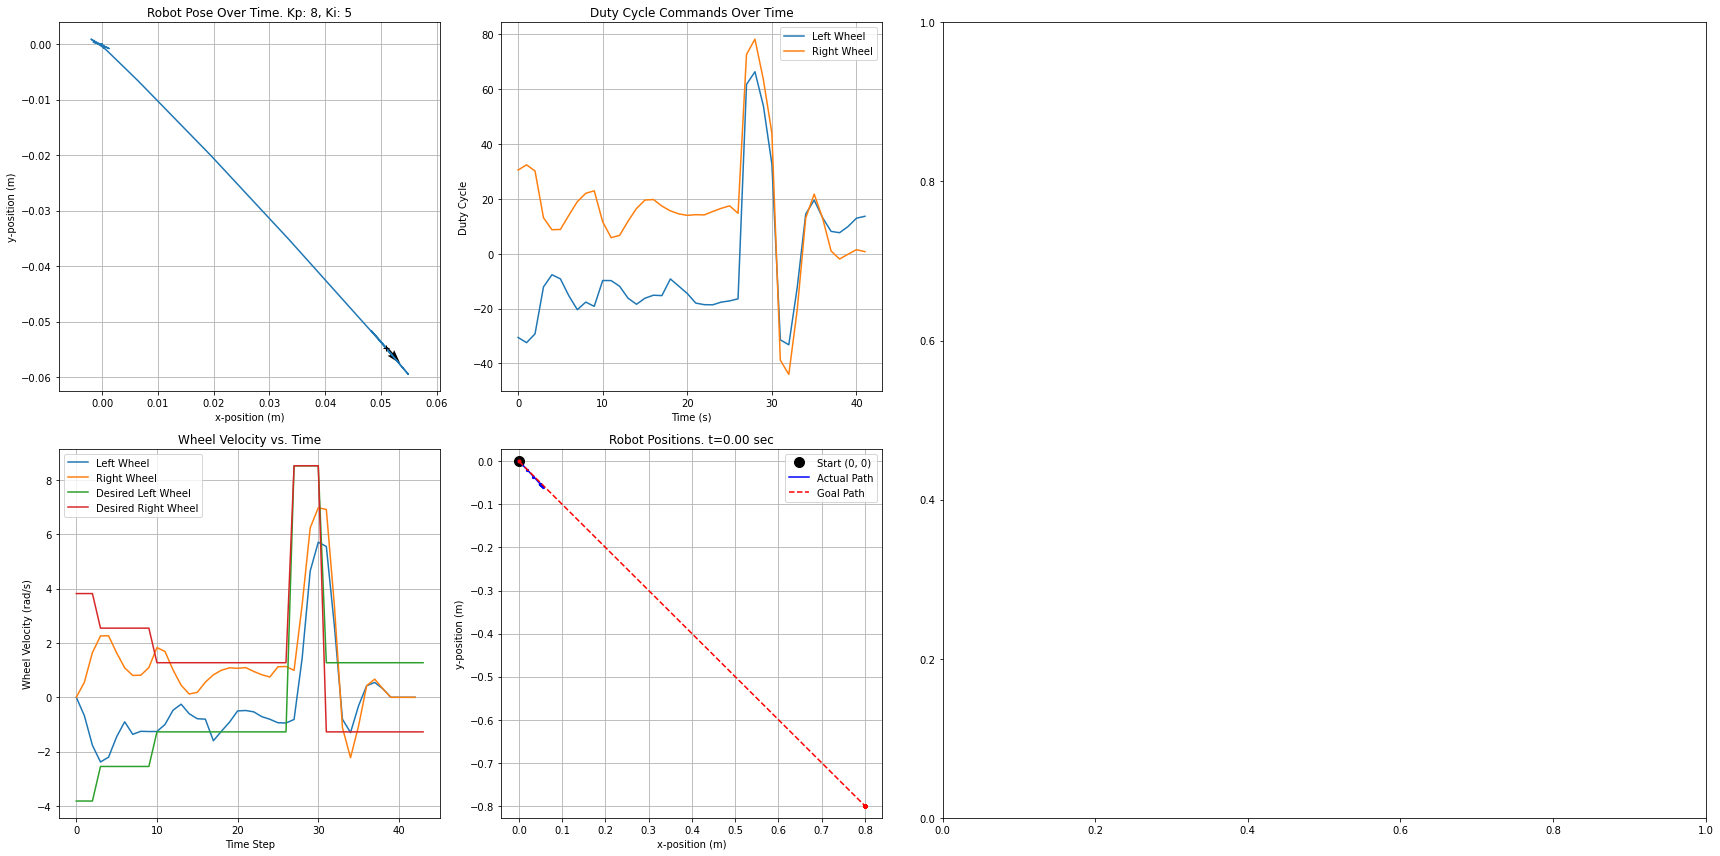

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


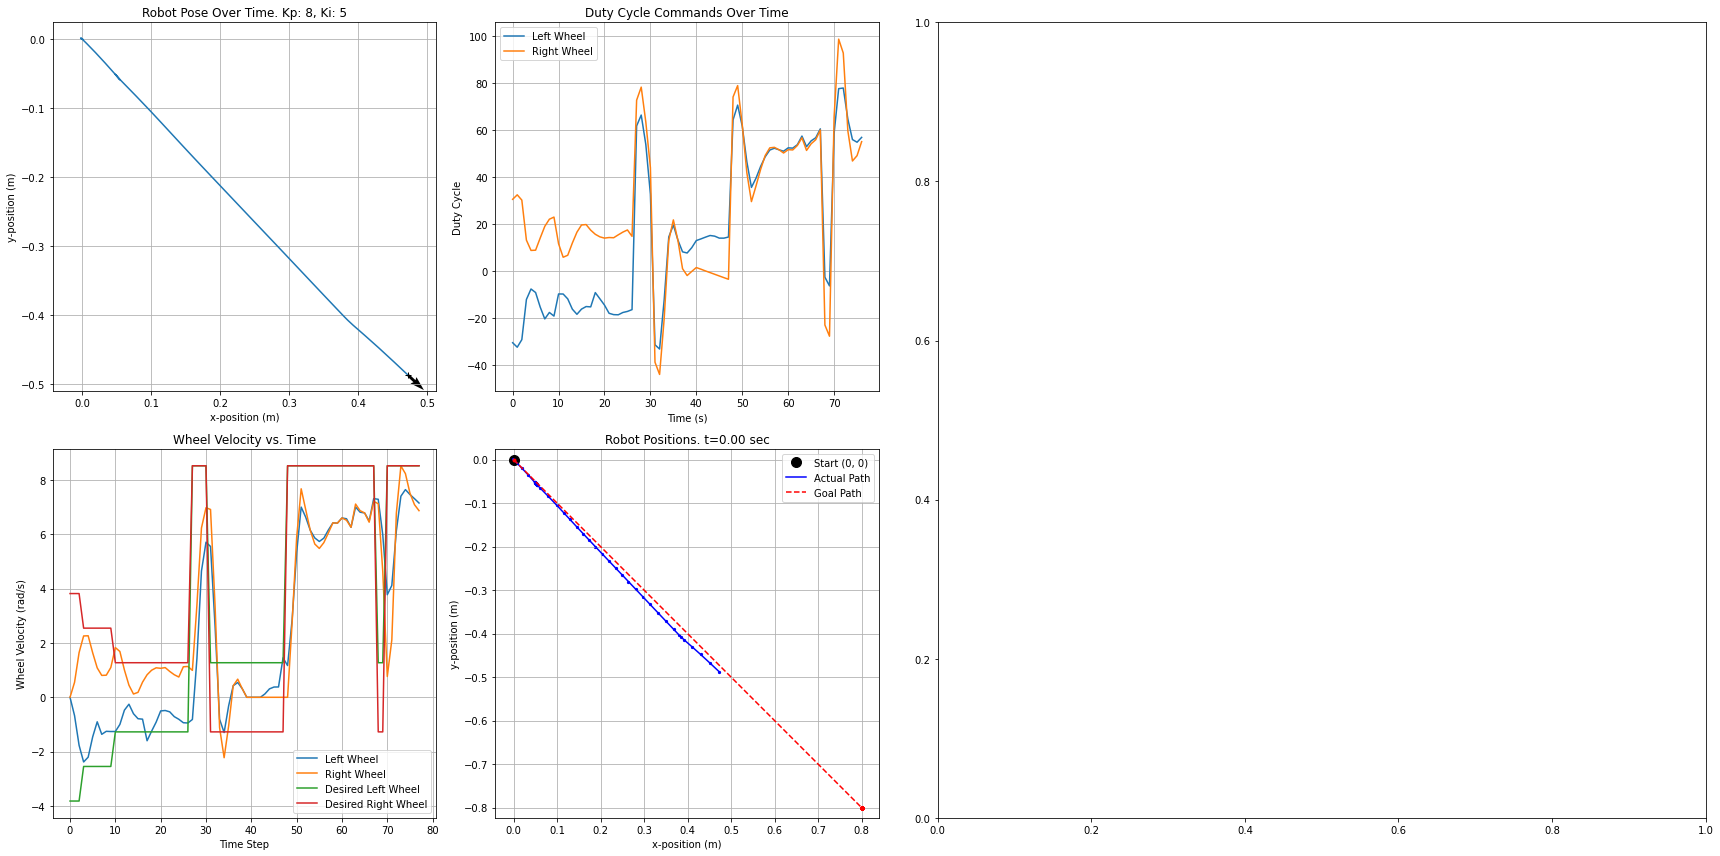

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


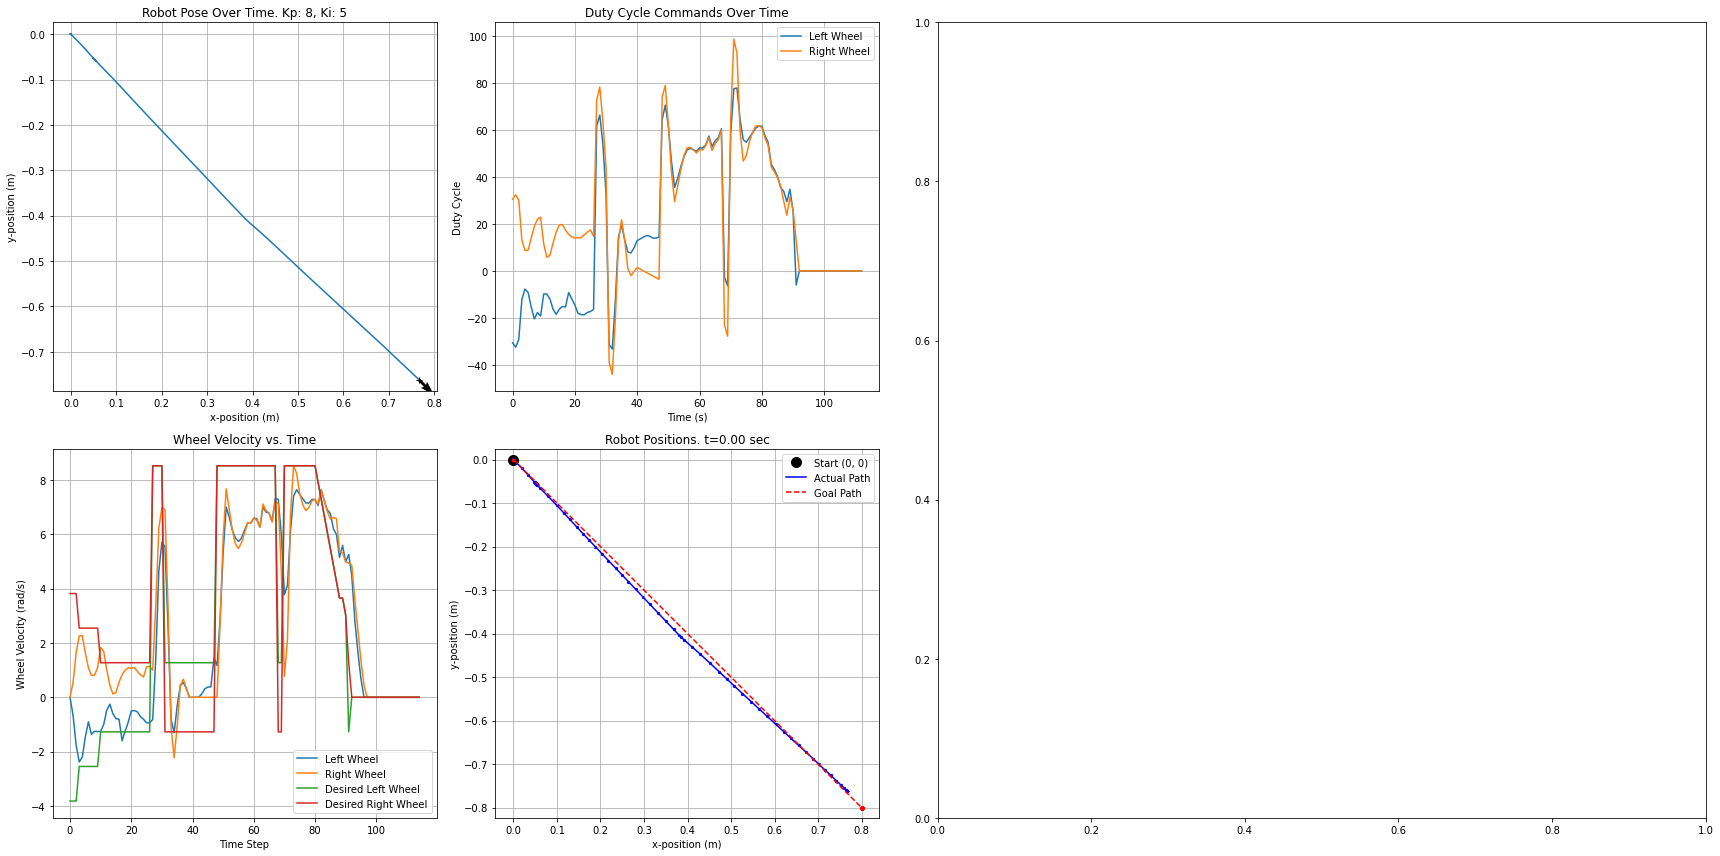

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


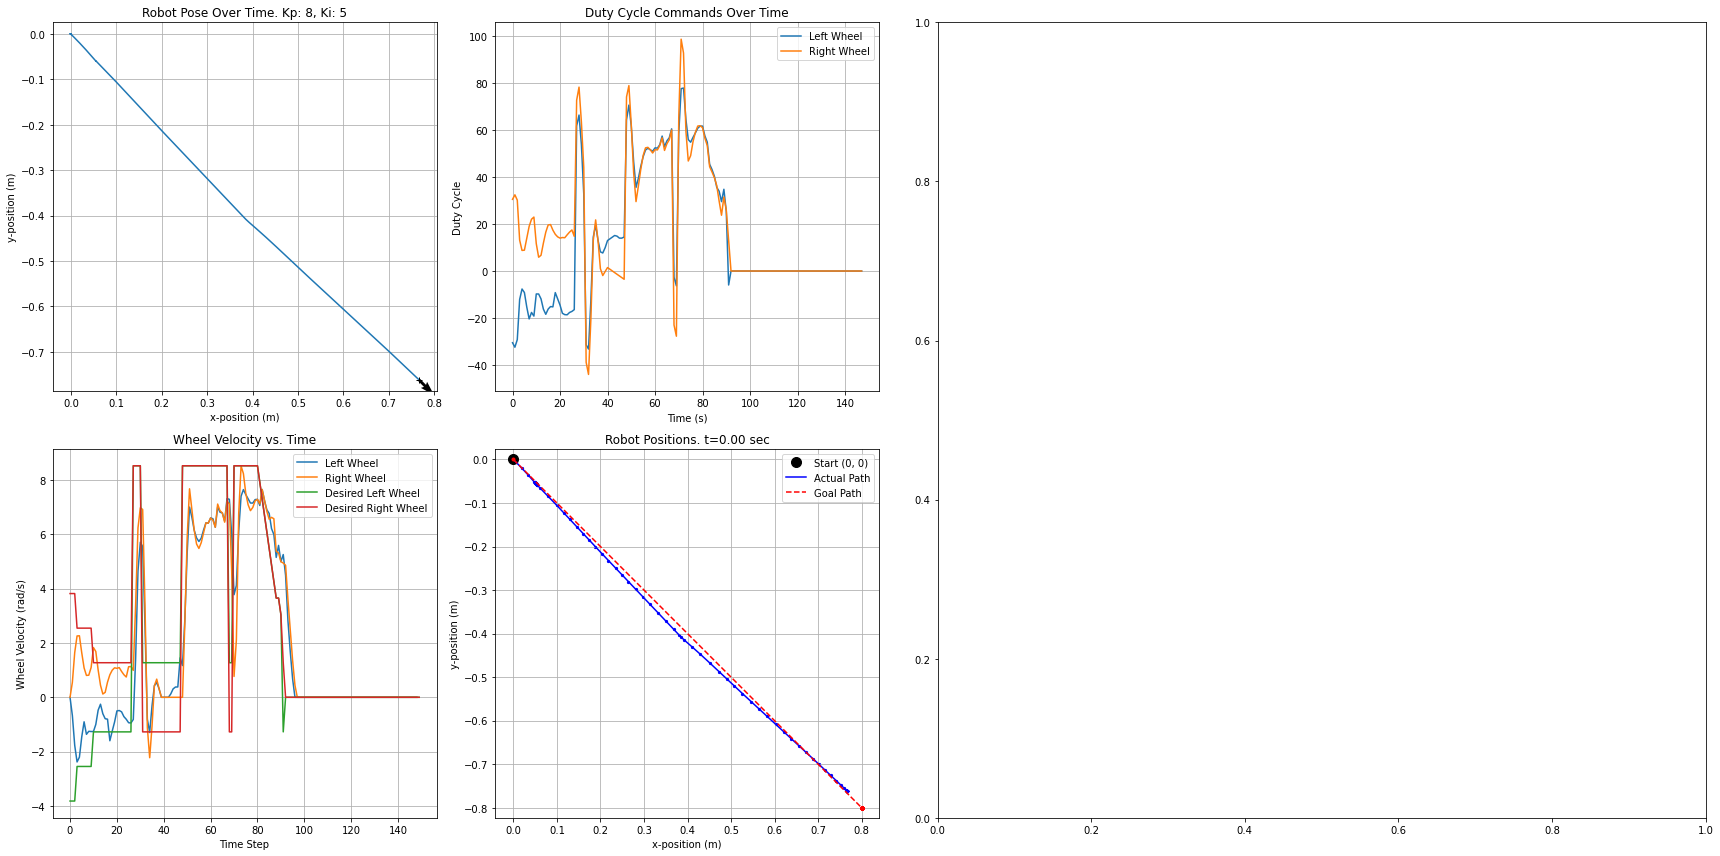

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


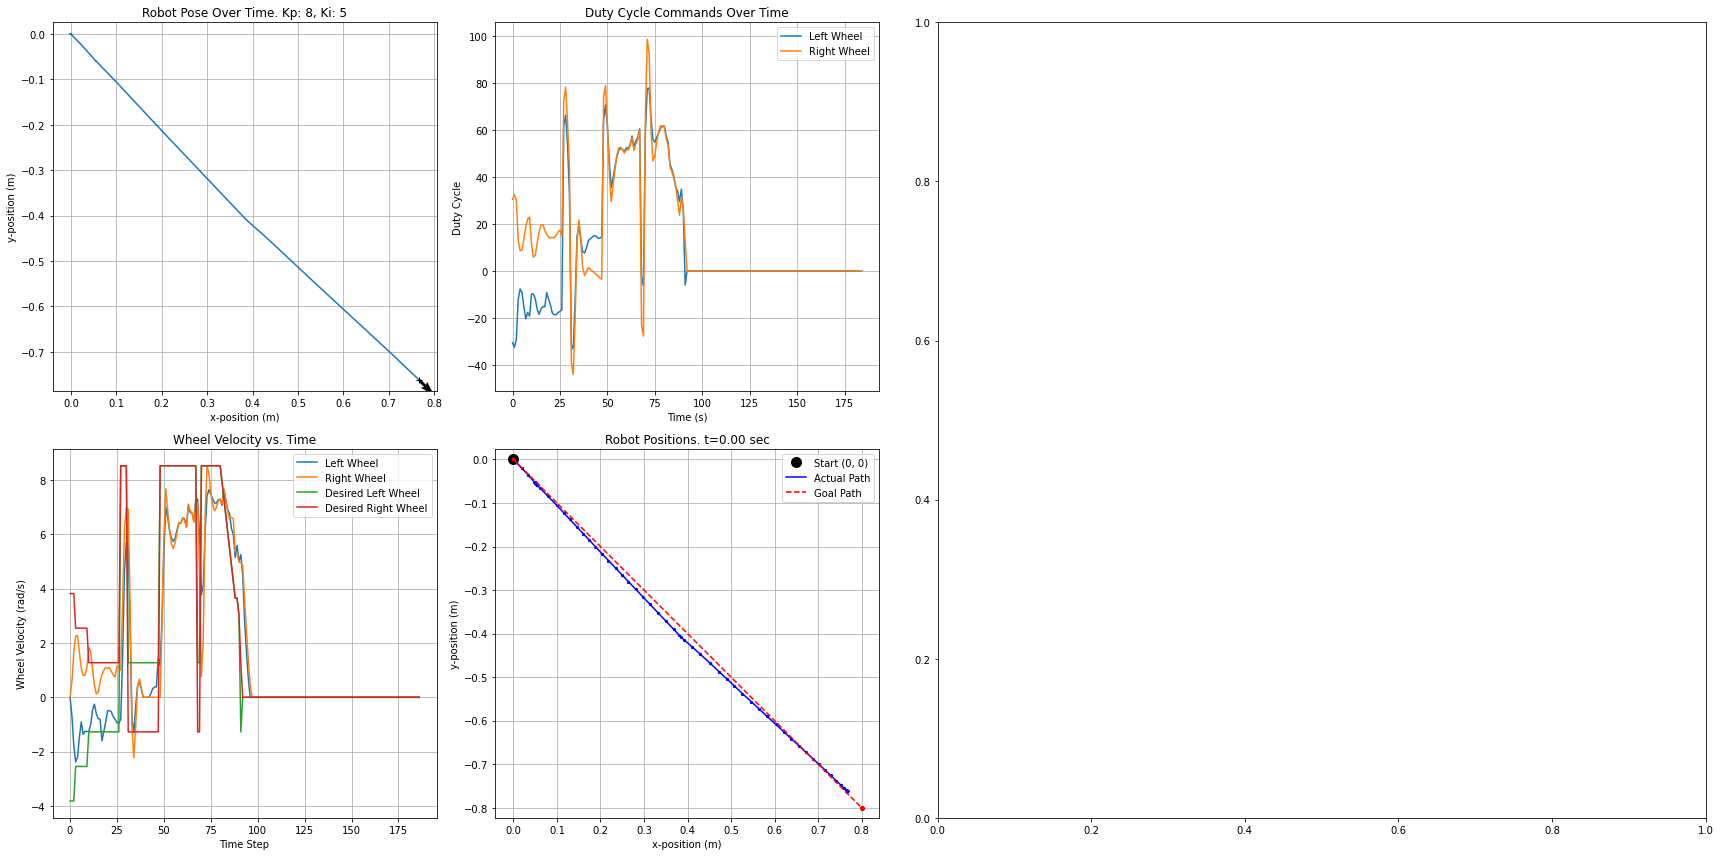

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


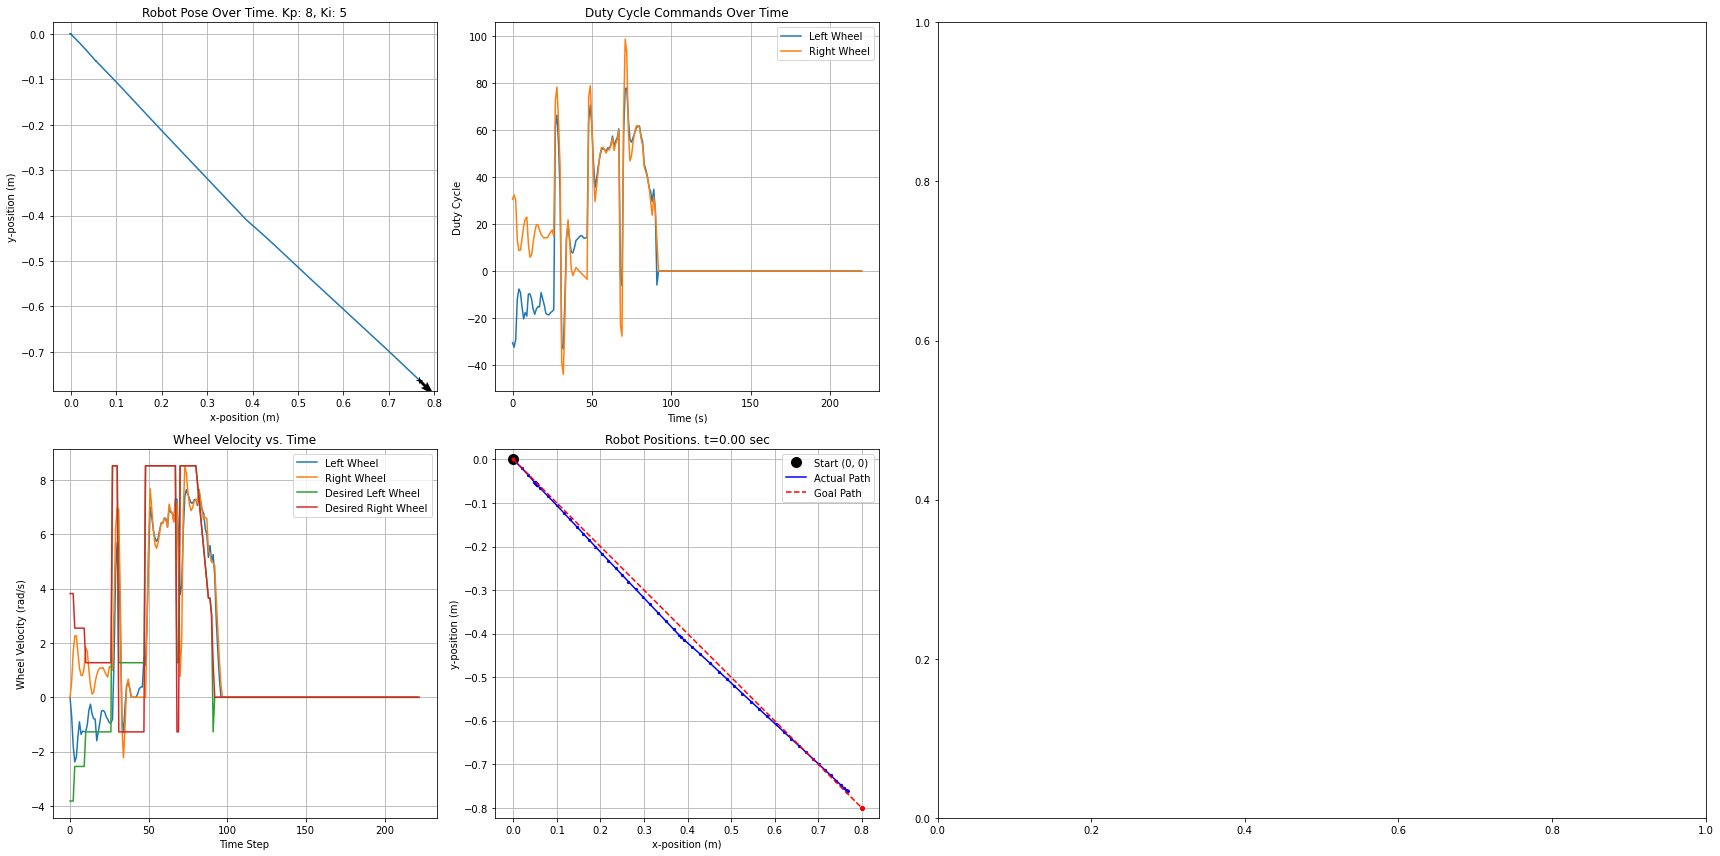

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


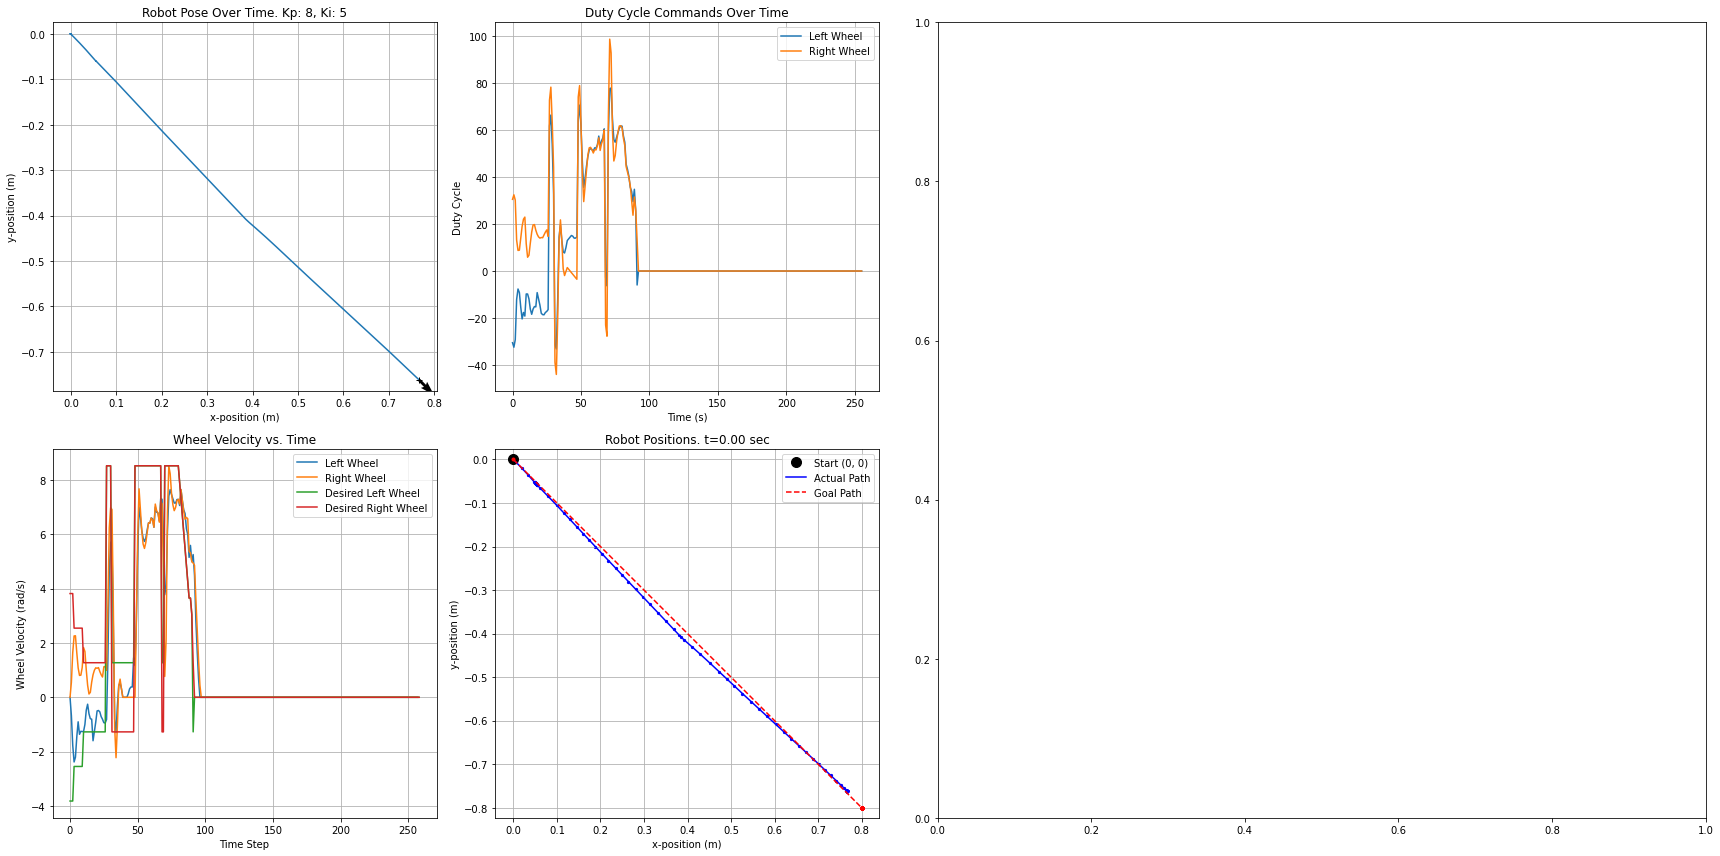

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


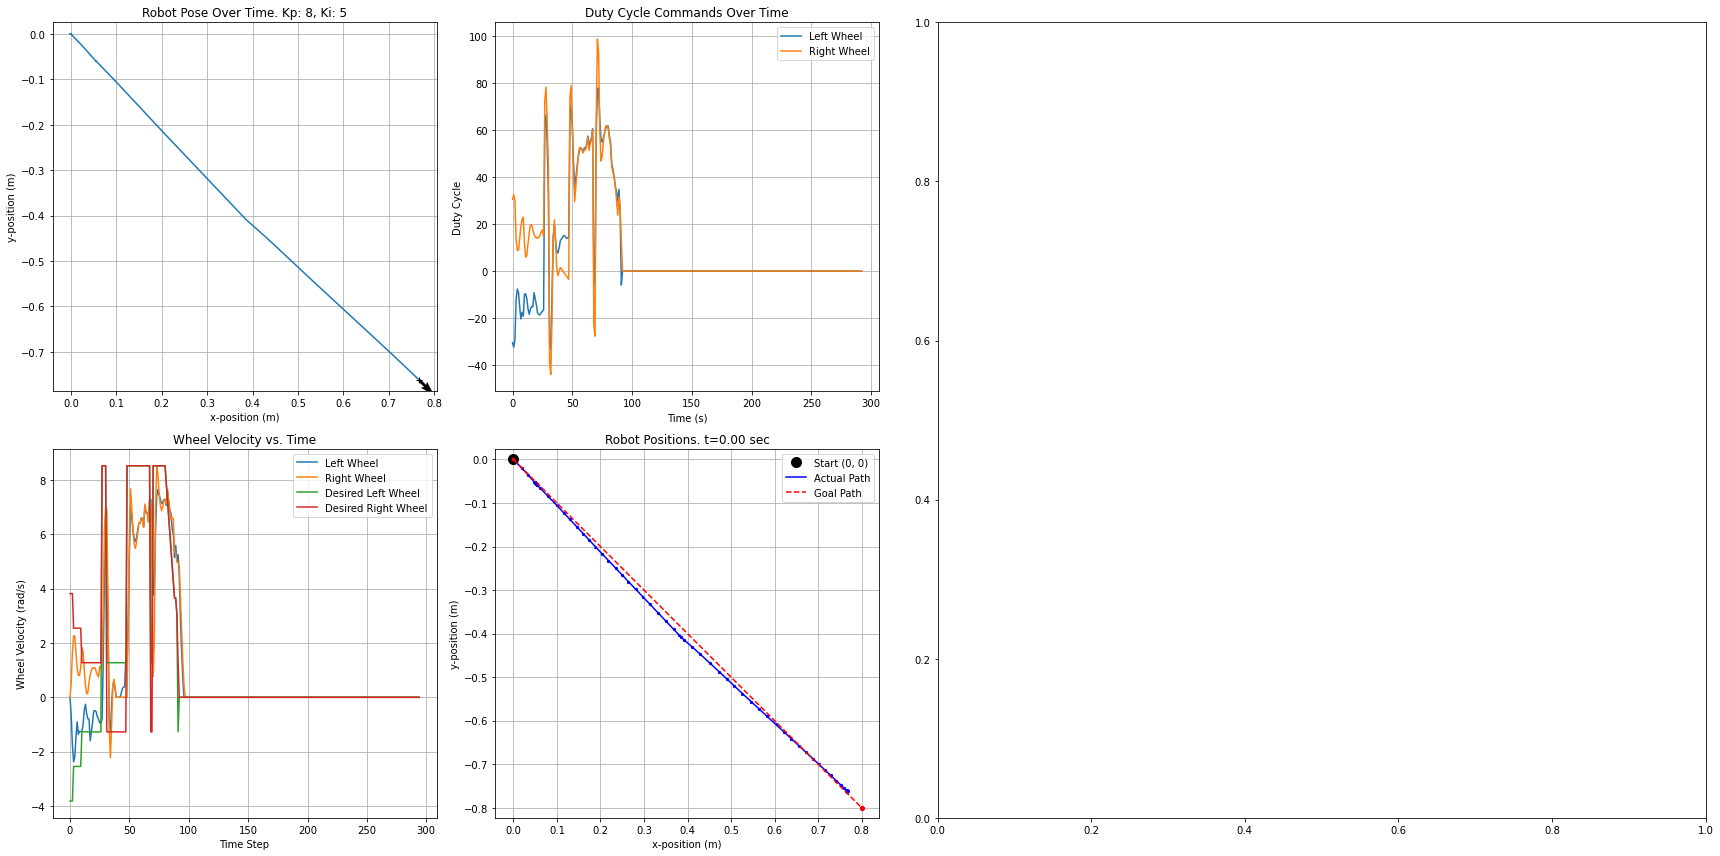

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop


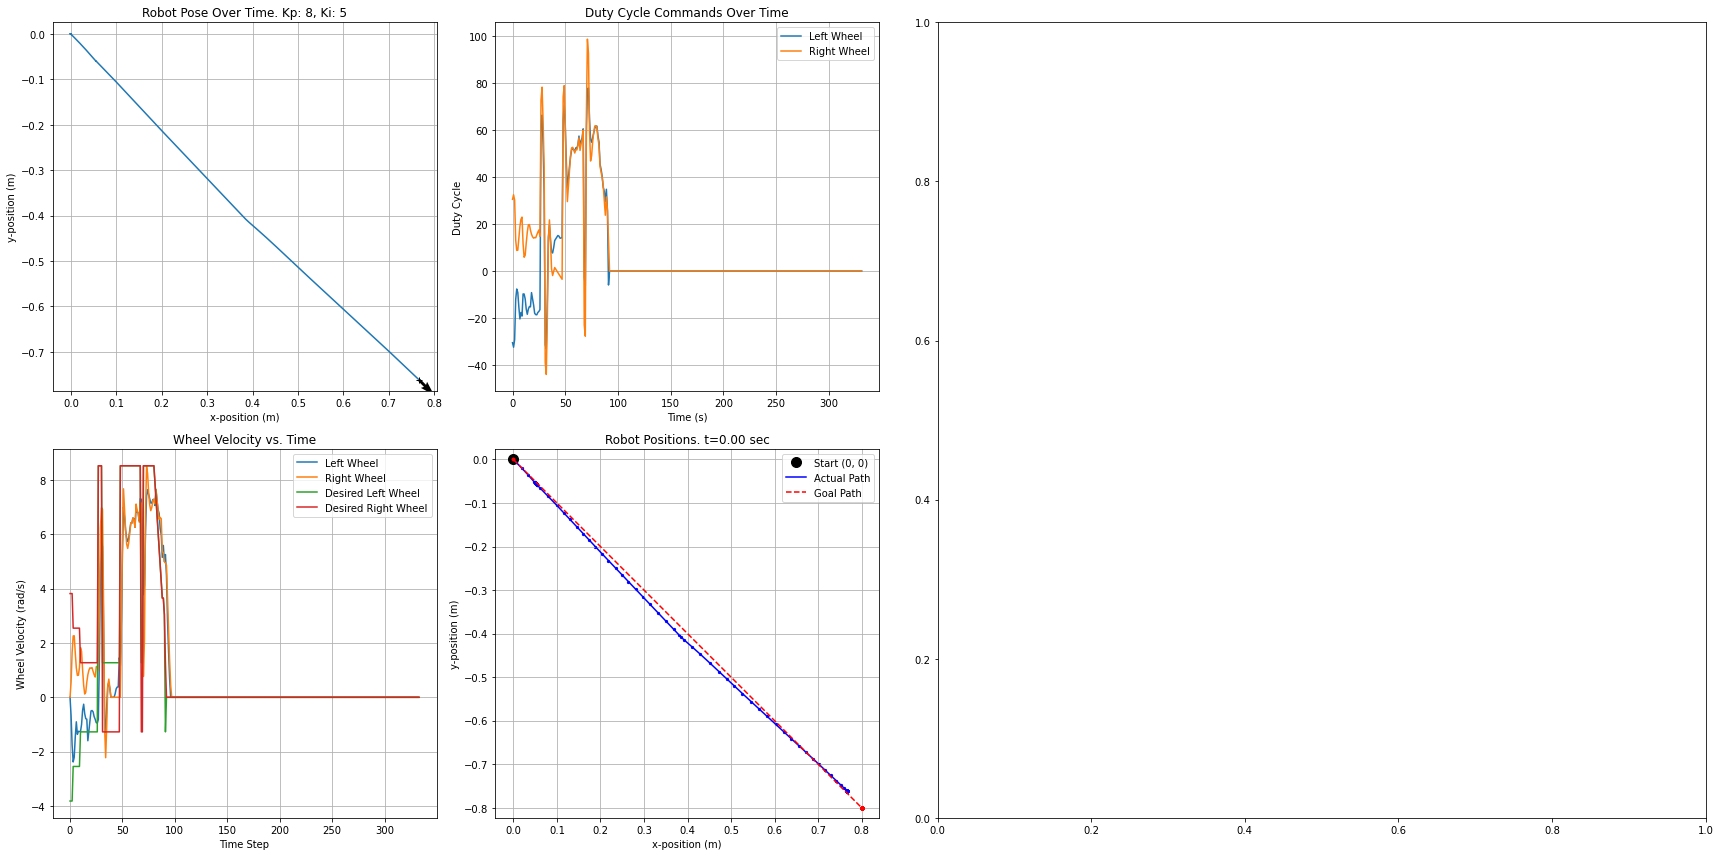

inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
inside running loop
Inside update_plot, robot graph data is none.


In [1]:
import os, sys
# print(f"{os.getcwd()}")
# sys.path.append(os.getcwd())
current_dir = os.getcwd()
ECE_tenni_dir = os.path.abspath(os.path.join(current_dir, "..", ".."))
print(ECE_tenni_dir)
sys.path.append(ECE_tenni_dir)

try: # Import the GPIO library. If it fails, we assume we are running on a non-Raspberry Pi system.
    import RPi.GPIO as GPIO
    import gpiozero
except ImportError:
    print("Not running on Raspberry Pi. GPIO library not imported.")
    pass

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.ion()  # Turn on interactive mode

from robot_core.coordinator.ProcessCoordinator import Coordinator

###############################################################################


# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# 
# coordinator = Coordinator(simulate=True, fig=fig, axes=axes, live_graphs=True, graph_interval=0.2, log=False)
# coordinator.run()

############## New approach
# Set up figure
fig = plt.figure(figsize=(24, 12))

# Create a GridSpec with 2 rows and 3 columns (2x2 grid on the left, and a single large plot on the right)
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 2])  # Width ratio for the right plot should be bigger

# Create the 2x2 subplots
ax1 = plt.subplot(gs[0, 0])  # Top-left
ax2 = plt.subplot(gs[0, 1])  # Top-right
ax3 = plt.subplot(gs[1, 0])  # Bottom-left
ax4 = plt.subplot(gs[1, 1])  # Bottom-right

# Create the large plot on the right, spanning both rows (occupies 2 rows in the 3rd column)
ax5 = plt.subplot(gs[:, 2])  # This spans the entire height (both rows) of the 3rd column


coordinator = Coordinator(simulate=False, fig=fig, axes=[ax1, ax2, ax3, ax4, ax5], live_graphs=True, graph_interval=0.2, log=False)
coordinator.run()
